In [25]:
from scipy.constants import g, G
from astropy.constants import R_earth, M_earth
from IPython.display import Latex
M_moon = 0.07346e24
r = 3.844e8

coeff  = G*M_moon/r**3
accel_scale = 2 * coeff * R_earth.value
Latex(f"tidal acceleration = {accel_scale:.2e} $\mathrm{{m/s^2}}$ = {accel_scale/g:.2e} g")

<IPython.core.display.Latex object>

In [29]:
h = 15 * M_moon * R_earth.value ** 4 / ( 8 * M_earth.value * r **3)
Latex(f"size of tidal bulge = {h:.2f} $\mathrm{{m}}$")

<IPython.core.display.Latex object>

$h=\dfrac{3MR_{\text{E}}^4}{4M_{\text{E}}r^3}\zeta $, where $\zeta\approx 5/2 $

[公式来源](https://www.sciencedirect.com/science/article/abs/pii/0019103566900510?via%3Dihub)

In [17]:
X = np.linspace(-1.1, 1.1, 23, endpoint=True)
Y = np.linspace(-1.1, 1.1, 23, endpoint=True)
R_x, R_y = np.meshgrid(R_earth.value * X, R_earth.value*Y)
R = np.sqrt(R_x **2 + R_y **2)
accel_x = np.ma.masked_where(R> R_earth.value, 2 * coeff * R_x)
accel_y = np.ma.masked_where(R> R_earth.value, - coeff * R_y)

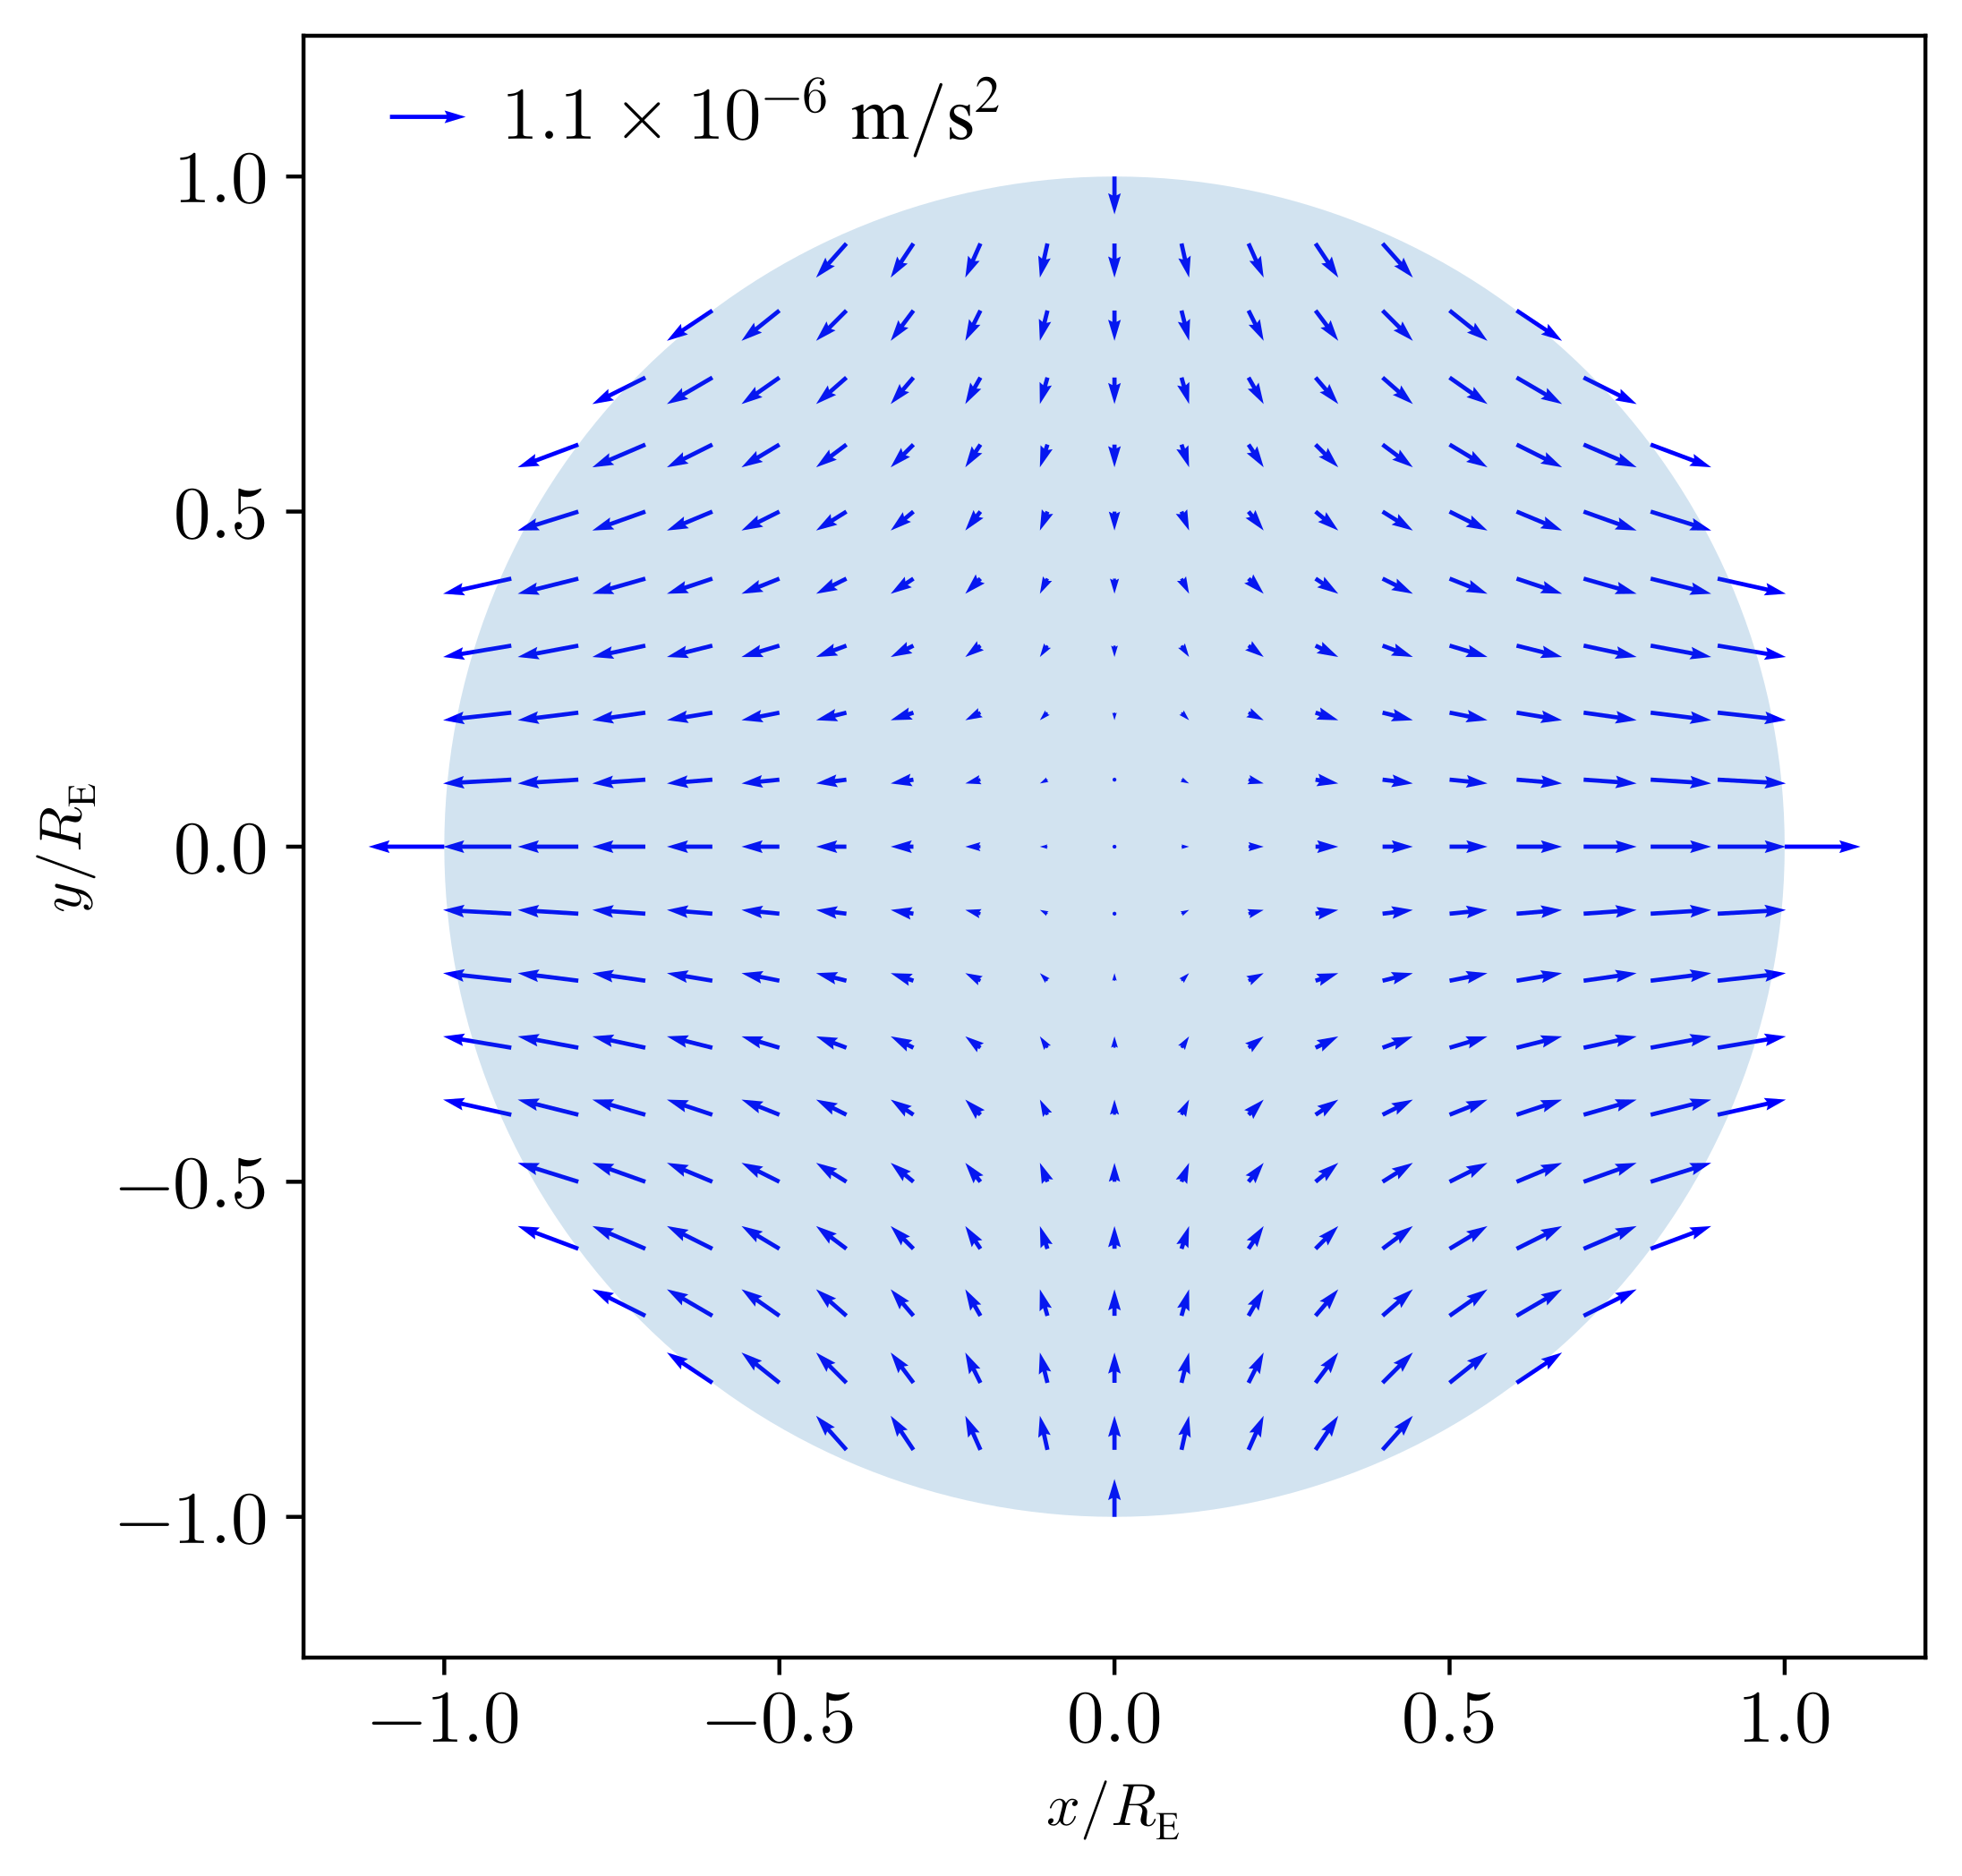

In [24]:
from matplotlib.patches import Circle
plt.figure()
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

arrows = ax.quiver(X,  Y, accel_x, accel_y, color='blue')
ax.quiverkey(arrows, X=.1, Y=.95, U=accel_scale,
            label=r"$1.1\times 10^{-6}\;\mathrm{m/s^2}$",
            labelpos='E')
circle = Circle((0, 0), 1, alpha=.2, ec='none')
ax.add_patch(circle)
ax.set_xlabel(r"$x/R_{\mathrm{E}}$", fontsize=12)
ax.set_ylabel(r"$y/R_{\mathrm{E}}$", fontsize=12);
plt.gcf()

In [22]:
#Exercise2.11
from scipy.constants import G
from astropy.constants import M_earth, R_earth, M_jup, R_jup
from IPython.display import Latex
M_moon = 0.07346e24
R_moon = 3475e3/2
r_earth_moon = 3.844e8
M_Io = 8.9319e22
R_Io = 1822e3
r_jup_Io = 4.217e8

In [17]:
h_Io = 15 * M_jup.value * R_Io ** 4 / ( 8 * M_Io * r_jup_Io **3)
Latex(f"size of tidal bulge on $\\text{{Io}}= {h_Io:.2f} \mathrm{{m}}$")

<IPython.core.display.Latex object>

In [23]:
h_Io = 15 * M_earth.value * R_moon ** 4 / ( 8 * M_moon * r_earth_moon **3)
Latex(f"size of tidal bulge on $\\text{{Moon}}= {h_Io:.2f} \mathrm{{m}}$")

<IPython.core.display.Latex object>

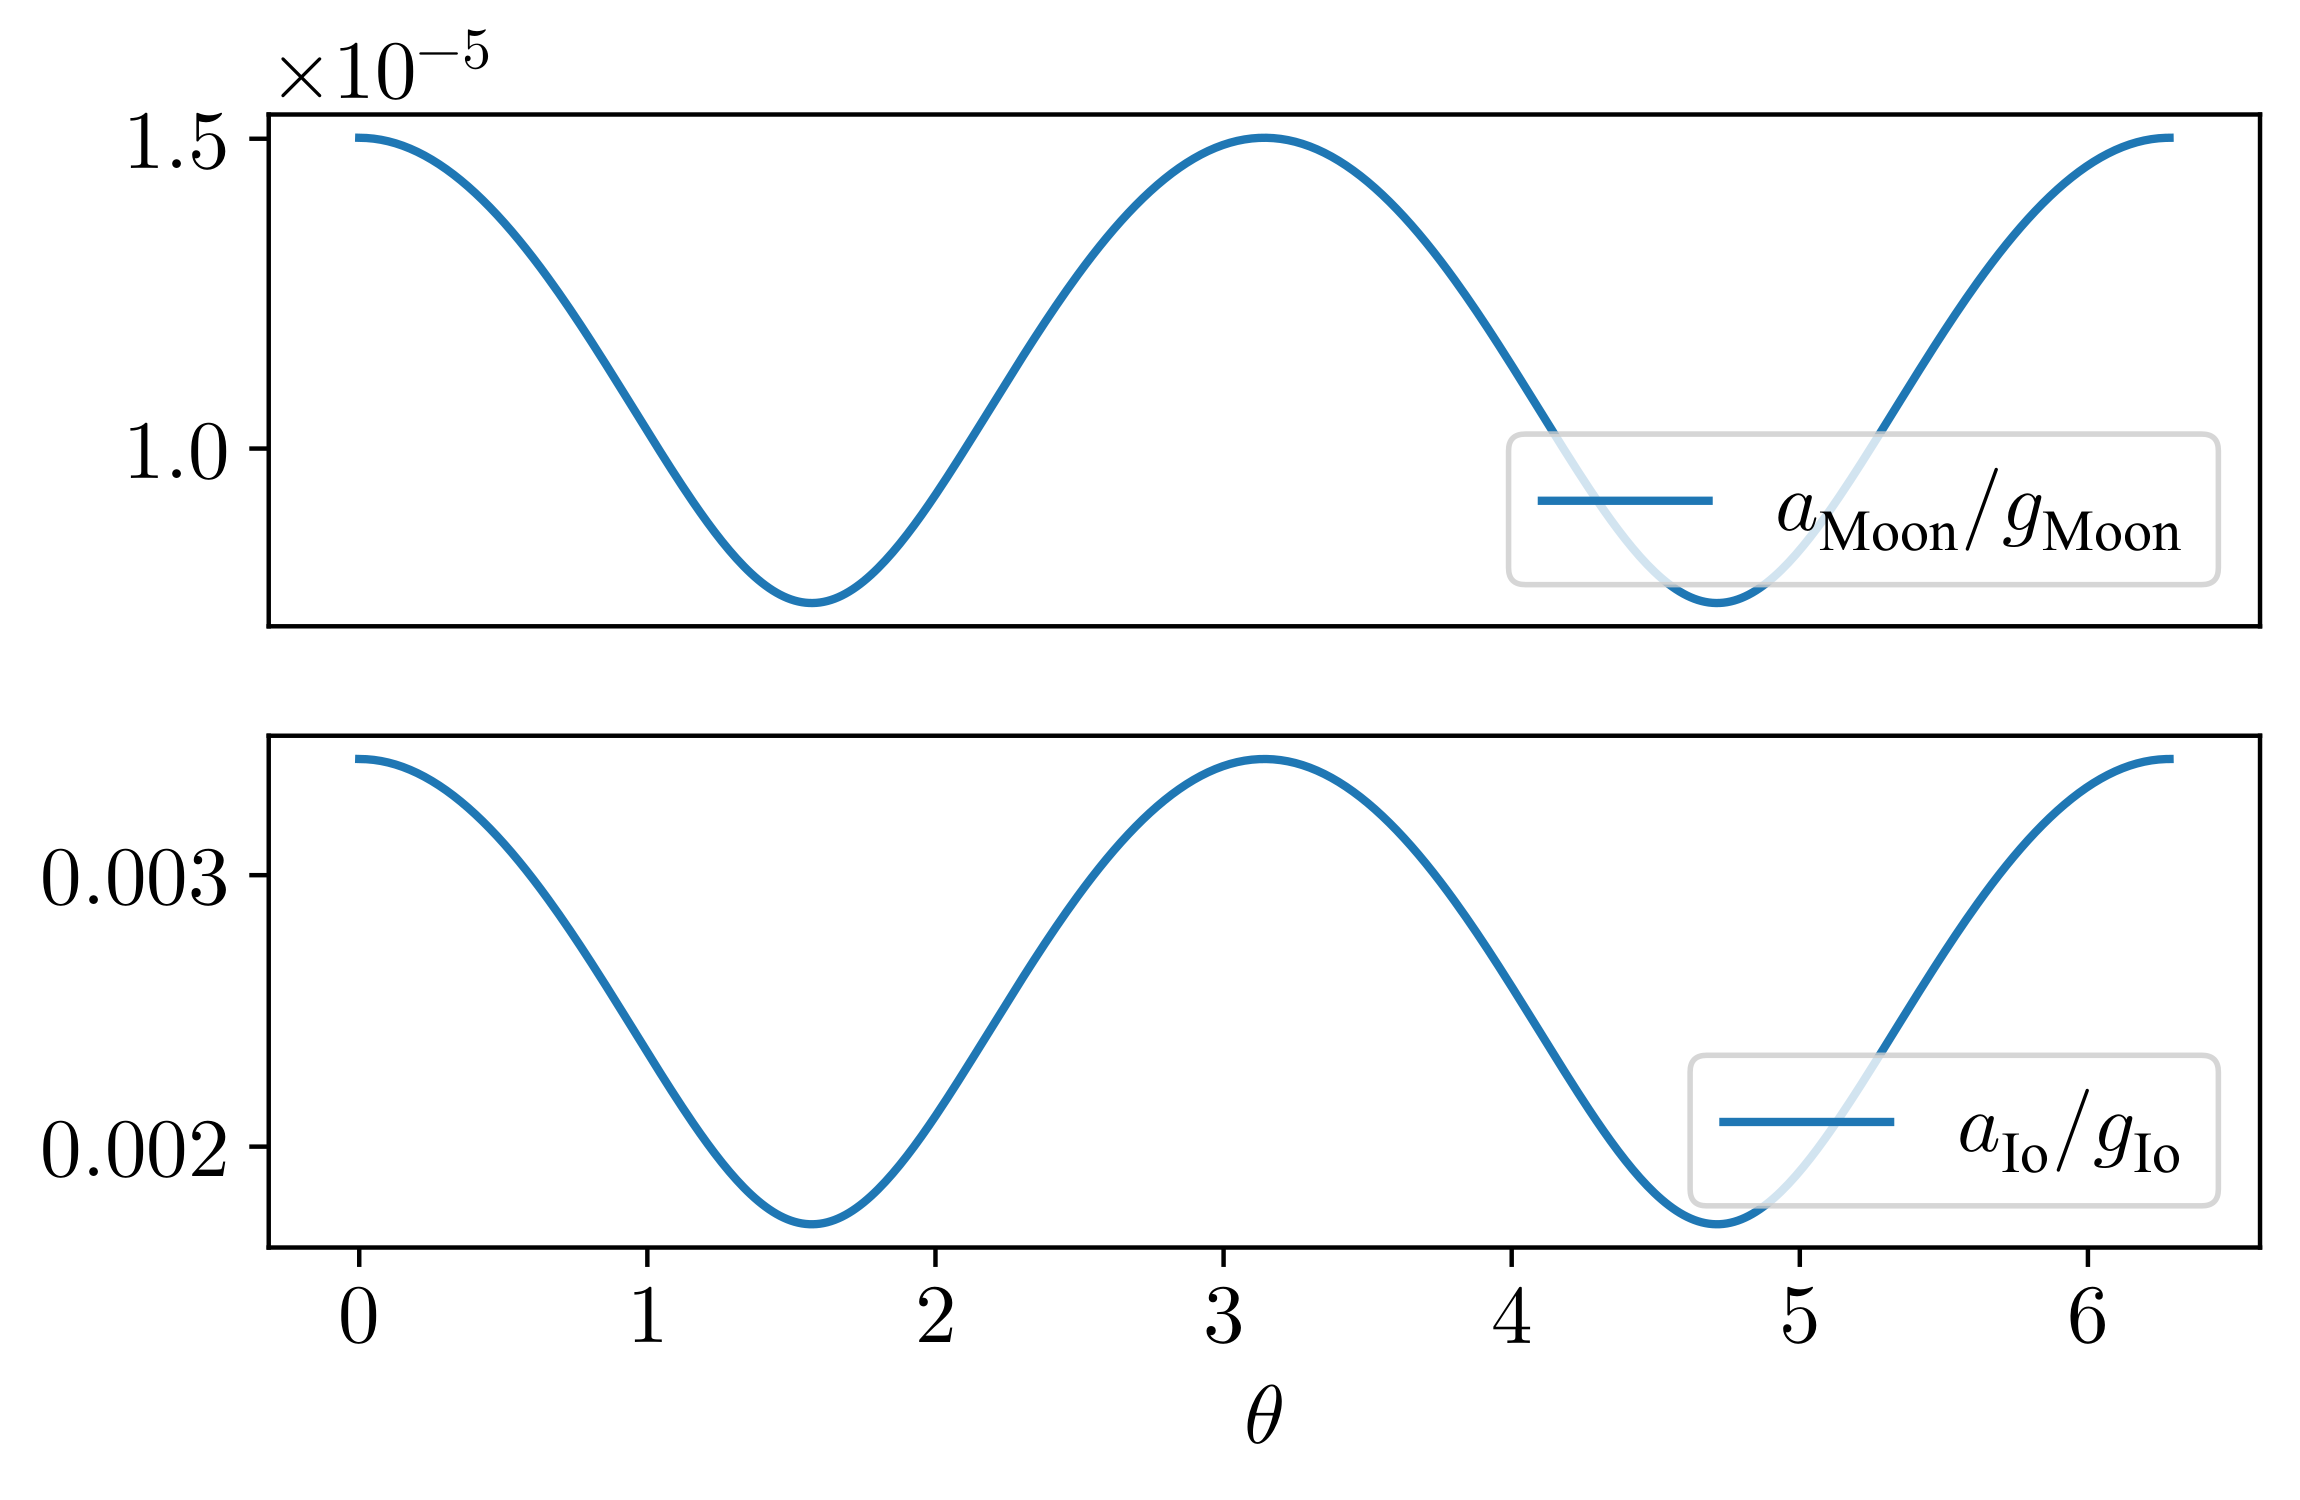

In [57]:
g_Io = G*M_Io/R_Io**2
g_Moon = G*M_moon/R_moon**2
theta = np.linspace(0, 2 * np.pi, 500)
Ratio_Io = G * M_jup * R_Io  * np.sqrt(1 + 3 *np.cos(theta)**2) / r_jup_Io ** 3 / g_Io
Ratio_Moon = G * M_earth.value \
             * R_moon  * np.sqrt(1 + 3 *np.cos(theta)**2) / r_earth_moon** 3 / g_Moon
plt.clf()
plt.figure()
plt.subplot(211)
plt.plot(theta, Ratio_Moon, label='$a_{\\text{Moon}}/g_{\\text{Moon}}$')
plt.xticks([])
plt.legend(loc='lower right')
plt.subplot(212)
plt.plot(theta, Ratio_Io, label='$a_{\\text{Io}}/g_{\\text{Io}}$')
plt.legend(loc='lower right')
plt.xlabel('$\\theta$')
plt.tight_layout()
plt.gcf()

In [ ]:
#Exercise2.12